100%|██████████| 30/30 [00:00<00:00, 324.80it/s]


10
           question          worker  answer
90  asylum madhouse  A19PMUTQXDIPLZ      10
96  asylum madhouse  A3CWG4SYLGAMHV      10
99  asylum madhouse   A8CQRBBVE7VED       8
97  asylum madhouse   AZ8KL6F16ZS7G       2
92  asylum madhouse  A1VKZFYJL9MQRY       9
..              ...             ...     ...
10   tool implement  A19PMUTQXDIPLZ       9
19   tool implement   A8CQRBBVE7VED       9
12   tool implement  A1VKZFYJL9MQRY       9
17   tool implement   AZ8KL6F16ZS7G       2
14   tool implement  A2XON1EQOHHFE4      10

[270 rows x 3 columns]
10 & 30 & 270 & 27.0$\pm$2.36 & 9.0$\pm$0.0 & 63
Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
2.8429999999999995 2.416333333333333
t-test Ttest_relResult(statistic=2.5138799100334706, pvalue=0.01300385777511448)
z-score -0.20594506666509527
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
2.8429999999999995 2.8183333333333334
t-test Ttest_relResult(statistic=0.16766123656905982, pvalue=0.86707713917

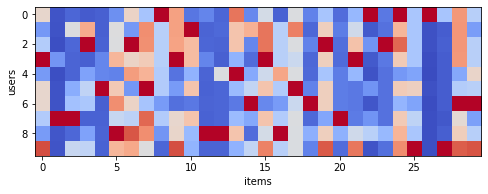

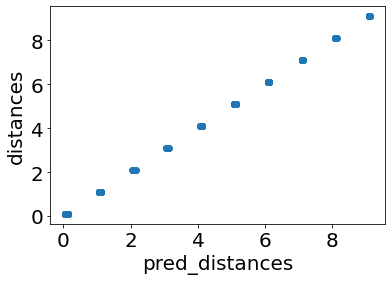

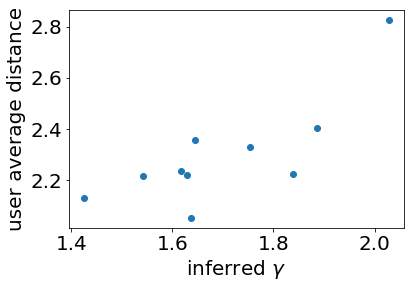

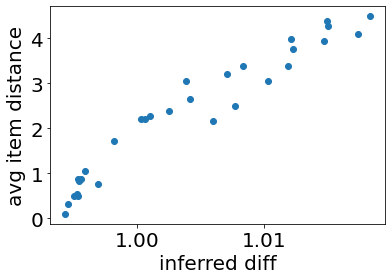

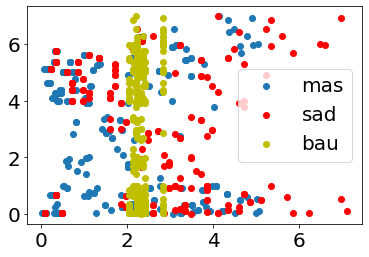

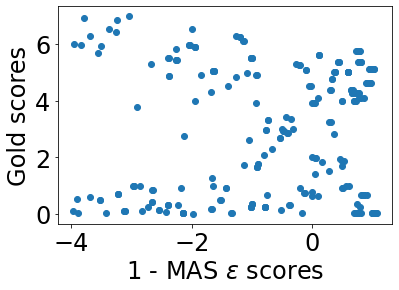

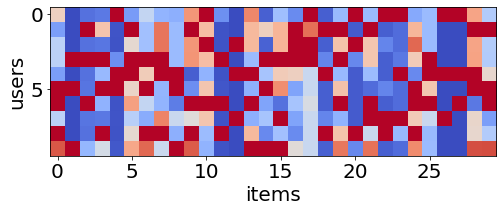

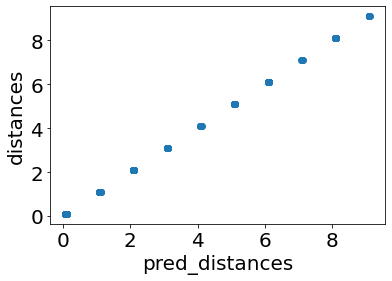

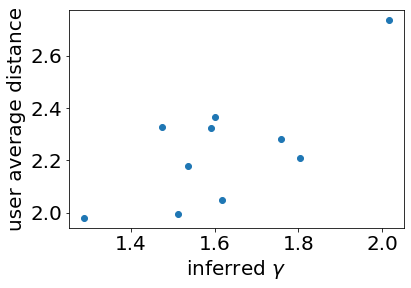

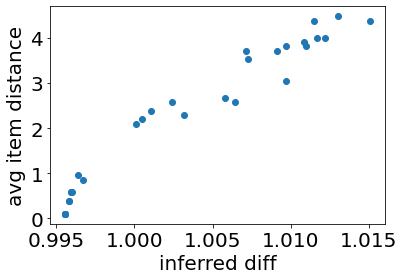

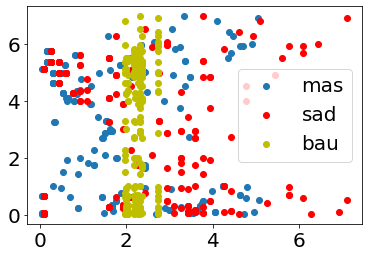

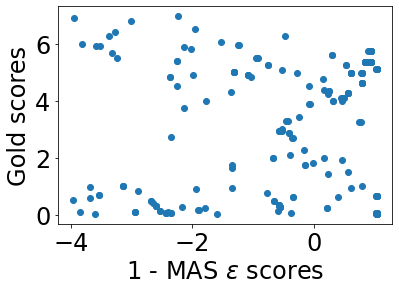

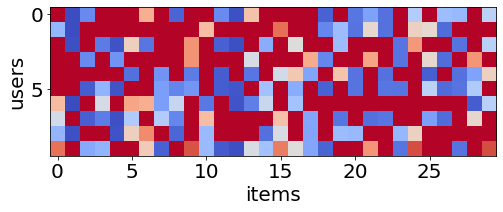

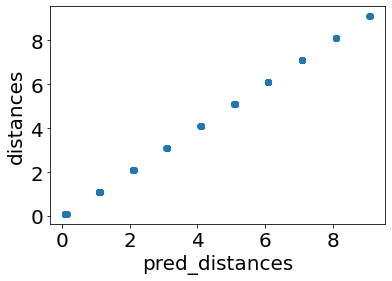

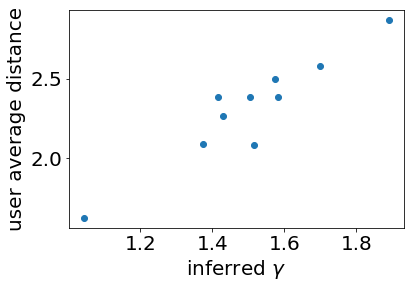

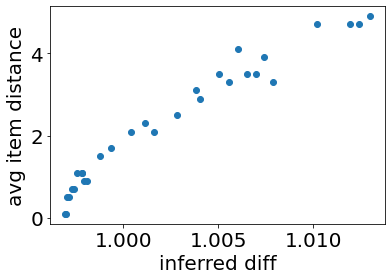

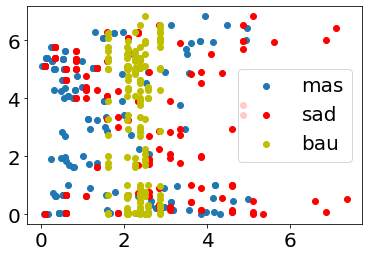

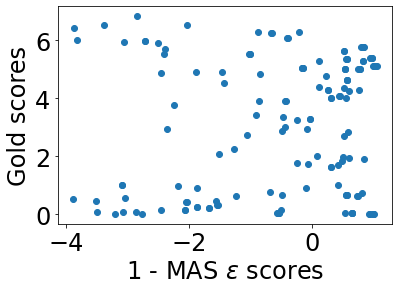

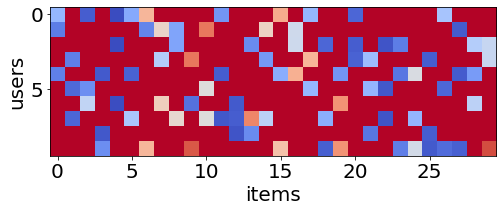

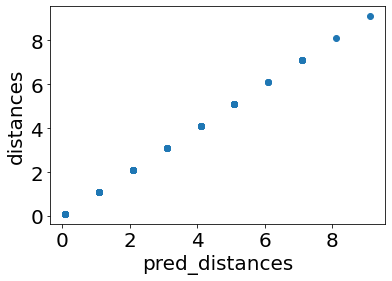

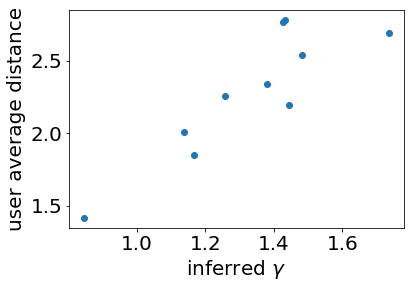

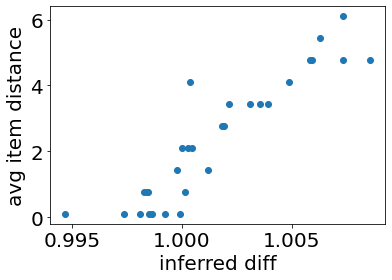

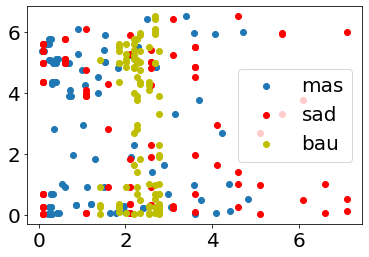

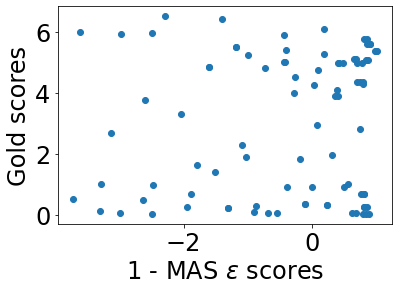

In [2]:




import itertools

import numpy
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from pandas import DataFrame

import experiments
import utils
from granularity import *
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, mean_absolute_error

input_df = pd.read_csv("answer_similarity.csv", sep=",")
truth_df = pd.read_csv("truth_similarity.csv")

annotation_df=DataFrame()
grouped_df = input_df.groupby('question')




minSamples=(numpy.min(input_df.groupby('question').size()))
print(minSamples)
dataRed = []
mae_SAD = []
mae_BAU = []
mae_MAS = []
rmse_SAD = []
rmse_BAU = []
rmse_MAS = []
mse_SAD = []
mse_BAU = []
mse_MAS = []



def grapher():


    for i in range(4):
        dataRed.append(int((minSamples-1)-(2*i)))

        annotation_df = DataFrame()
        for q in grouped_df.groups:
            annotation_df = annotation_df.append(grouped_df.get_group(q).sample(int((minSamples-1)-(2*i))))

        print(annotation_df)

        dist_fn = lambda x, y: abs(x - y)

        eval_fn = lambda x, y: abs(1 - dist_fn(x, y))

        temporal_exp = experiments.RealExperiment(eval_fn, "answer", "question", "worker", dist_fn)
        temporal_exp.setup(annodf=annotation_df, golddf=truth_df, c_anno_uid="worker", c_anno_item="question",
                       c_anno_label="answer",
                       c_gold_item="question", c_gold_label="truth")

        temporal_exp.describe_data()

        temporal_exp.train()

        temporal_exp.test(debug=True)
        _ = temporal_exp.debug(plot_vs_gold=True, skip_miniplots=True)

        rmse_MAS.append(numpy.sqrt(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.mas_preds.values()))))
        rmse_BAU.append(numpy.sqrt(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.bau_preds.values()))))
        rmse_SAD.append(numpy.sqrt(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.sad_preds.values()))))

        mse_MAS.append(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.mas_preds.values())))
        mse_BAU.append(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.bau_preds.values())))
        mse_SAD.append(mean_squared_error(list(temporal_exp.golddict.values()), list(temporal_exp.sad_preds.values())))

        mae_MAS.append(mean_absolute_error(list(temporal_exp.golddict.values()), list(temporal_exp.mas_preds.values())))
        mae_BAU.append(mean_absolute_error(list(temporal_exp.golddict.values()), list(temporal_exp.bau_preds.values())))
        mae_SAD.append(mean_absolute_error(list(temporal_exp.golddict.values()), list(temporal_exp.sad_preds.values())))

    # dataRed.append(1)
    # annotation_df = input_df.groupby('question').agg(lambda x: x.sample(1))
    # mae_BAU.append(mean_absolute_error(list(truth_df['truth']),list(annotation_df['answer'])))    mae_SAD.append(mean_absolute_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # mae_MAS.append(mean_absolute_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # mse_BAU.append(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # mse_SAD.append(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # mse_MAS.append(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer']))))
    # rmse_BAU.append(numpy.sqrt(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer'])))))
    # rmse_SAD.append(numpy.sqrt(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer'])))))
    # rmse_MAS.append(numpy.sqrt(mean_squared_error(list(truth_df['truth'],list(annotation_df['answer'])))))



grapher()
























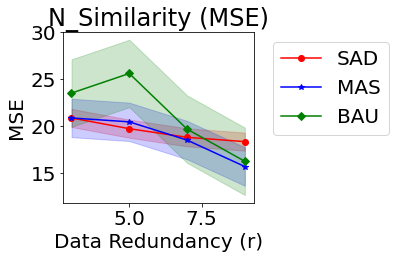

In [3]:


plt.plot(np.array(dataRed),np.array(mse_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(mse_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(mse_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(mse_SAD-np.std(mse_SAD)),np.array(mse_SAD+np.std(mse_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(mse_MAS-np.std(mse_MAS)),np.array(mse_MAS+np.std(mse_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(mse_BAU-np.std(mse_BAU)),np.array(mse_BAU+np.std(mse_BAU)),alpha=0.2,color='g')


plt.title("N_Similarity (MSE)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('N_Similarity(MSE).png')
plt.show()


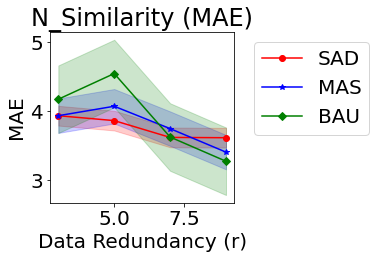

In [4]:

plt.plot(np.array(dataRed),np.array(mae_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(mae_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(mae_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(mae_SAD-np.std(mae_SAD)),np.array(mae_SAD+np.std(mae_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(mae_MAS-np.std(mae_MAS)),np.array(mae_MAS+np.std(mae_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(mae_BAU-np.std(mae_BAU)),np.array(mae_BAU+np.std(mae_BAU)),alpha=0.2,color='g')


plt.title("N_Similarity (MAE)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("MAE")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('N_Similarity(MAE).png')
plt.show()


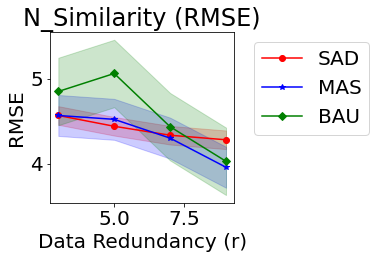

In [5]:
plt.plot(np.array(dataRed),np.array(rmse_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(rmse_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(rmse_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(rmse_SAD-np.std(rmse_SAD)),np.array(rmse_SAD+np.std(rmse_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(rmse_MAS-np.std(rmse_MAS)),np.array(rmse_MAS+np.std(rmse_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(rmse_BAU-np.std(rmse_BAU)),np.array(rmse_BAU+np.std(rmse_BAU)),alpha=0.2,color='g')


plt.title("N_Similarity (RMSE)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("RMSE")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('N_Similarity(RMSE).png')
plt.show()

